In [11]:
s = """
Titanic Machine learning from disaster

Columns     DESCRIPTION:
survival	Survival	            0 = No, 1 = Yes
pclass      Ticket class	        1 = 1st, 2 = 2nd, 3 = 3rd
sex	        Sex	
Age	        Age in years	
sibsp	    # of siblings / spouses aboard the Titanic	
parch	    # of parents / children aboard the Titanic	
ticket	    Ticket number	
fare	    Passenger fare	
cabin	    Cabin number	
embarked	Port of Embarkation	    C = Cherbourg, Q = Queenstown, S = Southampton

"""
print(s)


Titanic Machine learning from disaster

Columns     DESCRIPTION:
survival	Survival	            0 = No, 1 = Yes
pclass      Ticket class	        1 = 1st, 2 = 2nd, 3 = 3rd
sex	        Sex	
Age	        Age in years	
sibsp	    # of siblings / spouses aboard the Titanic	
parch	    # of parents / children aboard the Titanic	
ticket	    Ticket number	
fare	    Passenger fare	
cabin	    Cabin number	
embarked	Port of Embarkation	    C = Cherbourg, Q = Queenstown, S = Southampton




In [12]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
warnings.filterwarnings(action = 'ignore')

In [13]:
PATH = "..\Titanic - Machine learning from disaster\\titanic"
    
FILES = os.listdir(PATH)

xTrain = pd.read_csv(PATH + "\\" + FILES[2])

xTest = pd.read_csv(PATH + "\\" + FILES[1])

xTrain.shape, xTest.shape

((891, 12), (418, 11))

In [14]:
Cols_notNeeded = ['Name', 'Ticket', 'Cabin']
_xTrain = xTrain.drop(Cols_notNeeded, inplace = False, axis  = 1)
_xTest = xTest.drop(Cols_notNeeded, inplace = False, axis  = 1)

print("Sample training data:\n\n{}\n\nSample training data:\n\n{}".format(_xTrain.head(), _xTest.head()))

Sample training data:

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S

Sample training data:

   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0          892       3    male  34.5      0      0   7.8292        Q
1          893       3  female  47.0      1      0   7.0000        S
2          894       2    male  62.0      0      0   9.6875        Q
3          895       3    male  27.0      0      0   8.6625        S
4          896       3  female  22.0      1      1  12.2875        S


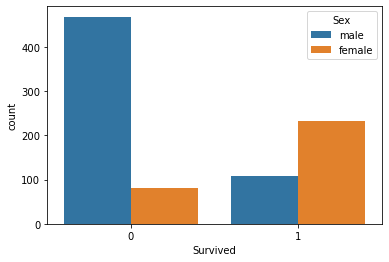

In [15]:
# visualizing Survival based on gender
sns.countplot(x = 'Survived', data = xTrain, hue = 'Sex')

plt.show()

Text(0.5, 0, 'Survival plot for Females')

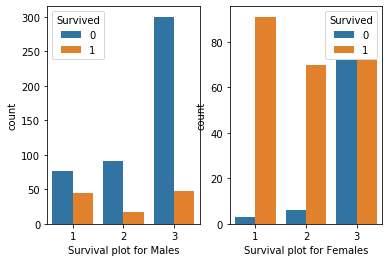

In [16]:
#visualizing Survival based on gender and class. 
plt.subplot(1,2,1)
sns.countplot(x = 'Pclass', data = xTrain[xTrain.Sex == 'male'], hue = 'Survived')
plt.xlabel("Survival plot for Males")
plt.subplot(1,2,2)
sns.countplot(x = 'Pclass', data = xTrain[xTrain.Sex == 'female'], hue = 'Survived')
plt.xlabel("Survival plot for Females")

In [17]:
# encoding text data to numerical data
def encode(df, mode):
    _df = df
    if mode == 'Sex':
        for i in range(df.shape[0]):
            if df[mode][i] == 'male':
                _df[mode][i] = 1
            else:
                _df[mode][i] = 0
    elif mode == 'Embarked':
        for i in range(df.shape[0]):
            if df[mode][i] == 'C':
                _df[mode][i] = 0
            elif df[mode][i] == 'Q':
                _df[mode][i] = 1
            else:
                _df[mode][i] = 2
    return _df

In [18]:
#encoding

__xTrain = encode(_xTrain, mode = 'Sex')
__xTrain = encode(__xTrain, mode = 'Embarked')
__xTrain.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [21]:
def predictLR(_xTrain, _xTest):
    __xTrain = encode(_xTrain, mode = 'Sex')
    __xTrain = encode(__xTrain, mode = 'Embarked')
    __xTrain = __xTrain.fillna(23)
    
    __xTest = encode(_xTest, mode = 'Sex')
    __xTest = encode(__xTest, mode = 'Embarked')
    __xTest = __xTest.fillna(23)
    
    
    LR = LogisticRegression()
    svc = SVC()
    
    #X = __xTrain.drop(columns = "Survived", inplace = False)
    X = __xTrain[['Pclass','Sex','Age','SibSp','Parch', 'Fare', 'Embarked']]
    y = __xTrain['Survived']

    trainX = X[0:800]
    trainy = y[0:800]

    cvX = X[801:890]
    cvy = y[801:890]

    LR.fit(trainX, trainy)
    svc.fit(trainX, trainy)
    print("Cross validation score LR:{}".format(LR.score(cvX, cvy)))
    print("Cross validation score LR:{}".format(svc.score(cvX, cvy)))
    #print(__xTest.columns)
    return __xTest['PassengerId'], svc.predict(__xTest[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]), 

In [22]:
res = predict(_xTrain, _xTest)

data = {'PassengerId':res[0] , 'Survived': res[1]}

df = pd.DataFrame(data)
df.to_csv("result.csv")

Cross validation score LR:0.7303370786516854
Cross validation score LR:0.6853932584269663
